In [1]:
import yaml

with open("protocol.yml") as f:
  data = yaml.safe_load(f)

In [2]:
import numpy as np
import pandas as pd
from pprint import PrettyPrinter
updated = []

for d in data:
  vals_gpu_true       = np.zeros(len(data[d][0]["data"]))
  vals_gpu_false      = np.zeros(len(data[d][0]["data"]))
  results_gpu_true    = dict.fromkeys(data[d][0]["data"].keys())
  results_gpu_false   = dict.fromkeys(data[d][0]["data"].keys())
  exp_count_gpu_true  = 0
  exp_count_gpu_false = 0
  
  accuracy_gpu_true   = []
  time_pred_gpu_true  = []
  time_train_gpu_true = []
  mem_pred_gpu_true   = []
  mem_train_gpu_true  = []

  accuracy_gpu_false   = []
  time_pred_gpu_false  = []
  time_train_gpu_false = []
  mem_pred_gpu_false   = []
  mem_train_gpu_false  = []

  for exp in data[d]:
    if exp["gpu"]:
      vals_gpu_true += np.array(list(exp["data"].values()))
      exp_count_gpu_true += 1
      accuracy_gpu_true.append(exp["data"]["Accuracy"])
      time_pred_gpu_true.append(exp["data"]["Zeit Vorhersage (in Sekunden)"])
      time_train_gpu_true.append(exp["data"]["Zeit Training (in Sekunden)"])
      mem_pred_gpu_true.append(exp["data"]["Speicherauslastung Vorhersage (in kByte)"])
      mem_train_gpu_true.append(exp["data"]["Speicherauslastung Training (in kByte)"])
    else:
      vals_gpu_false += np.array(list(exp["data"].values()))
      exp_count_gpu_false += 1
      accuracy_gpu_false.append(exp["data"]["Accuracy"])
      time_pred_gpu_false.append(exp["data"]["Zeit Vorhersage (in Sekunden)"])
      time_train_gpu_false.append(exp["data"]["Zeit Training (in Sekunden)"])
      mem_pred_gpu_false.append(exp["data"]["Speicherauslastung Vorhersage (in kByte)"])
      mem_train_gpu_false.append(exp["data"]["Speicherauslastung Training (in kByte)"])
  for res, val in zip(results_gpu_true, vals_gpu_true):
    results_gpu_true[res] = val / exp_count_gpu_true
  for res, val in zip(results_gpu_false, vals_gpu_false):
    results_gpu_false[res] = val / exp_count_gpu_false
  updated_dat = {prop: val for prop, val in zip(data[d][0], data[d][0].values()) if not prop=="data" and not prop=="seed"}
  updated_dat["Accuracy Standardabweichung"] = np.std(accuracy_gpu_false)
  updated_dat["Datensatz"] = updated_dat.pop("dataset")
  updated_dat["Distanz Funktion"] = updated_dat.pop("dist_func")
  updated_dat["Epochen"] = updated_dat.pop("epoch")
  updated_dat["GPU"] = "False"
  updated_dat["LVQ Variante"] = updated_dat.pop("lvq_type")
  updated_dat["Anzahl Prototypen"] = updated_dat.pop("prototype_count")
  updated_dat["Speicherauslastung Vorhersage Standardabweichung (in kByte)"] = np.std(mem_pred_gpu_false)
  updated_dat["Speicherauslastung Training Standardabweichung (in kByte)"] = np.std(mem_train_gpu_false)
  updated_dat["Zeit Vorhersage Standardabweichung (in Sekunden)"] = np.std(time_pred_gpu_false)
  updated_dat["Zeit Training Standardabweichung (in Sekunden)"] = np.std(time_train_gpu_false)
  updated_dat.update(results_gpu_false)
  updated.append(updated_dat)    
  if exp_count_gpu_true > 0:
    updated_dat = {prop: val for prop, val in zip(data[d][0], data[d][0].values()) if not prop=="data" and not prop=="seed"}
    updated_dat["Accuracy Standardabweichung"] = np.std(accuracy_gpu_true)
    updated_dat["Datensatz"] = updated_dat.pop("dataset")
    updated_dat["Distanz Funktion"] = updated_dat.pop("dist_func")
    updated_dat["Epochen"] = updated_dat.pop("epoch")
    updated_dat["GPU"] = "True"
    updated_dat["LVQ Variante"] = updated_dat.pop("lvq_type")
    updated_dat["Anzahl Prototypen"] = updated_dat.pop("prototype_count")
    updated_dat["Speicherauslastung Vorhersage Standardabweichung (in kByte)"] = np.std(mem_pred_gpu_true)
    updated_dat["Speicherauslastung Training Standardabweichung (in kByte)"] = np.std(mem_train_gpu_true)
    updated_dat["Zeit Vorhersage Standardabweichung (in Sekunden)"] = np.std(time_pred_gpu_true)
    updated_dat["Zeit Training Standardabweichung (in Sekunden)"] = np.std(time_train_gpu_true)
    updated_dat.update(results_gpu_true)
    updated.append(updated_dat)

pp = PrettyPrinter(indent=4)

/tmp/ipykernel_57236/4023469661.py:44: RuntimeWarning: invalid value encountered in double_scalars
  results_gpu_true[res] = val / exp_count_gpu_true


In [3]:
import matplotlib.pyplot as plt
import matplotlib

def plot_accuracy(data, epochs):
  font = {'size'   : 13.5}
  matplotlib.rc('font', **font)

  for dataset in set(data["Datensatz"].values):
    p_1 = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["Accuracy"].dropna().values
    p_4 = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 4.0))["Accuracy"].dropna().values
    p_9 = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 9.0))["Accuracy"].dropna().values

    p_1_std = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["Accuracy Standardabweichung"].dropna().values
    p_4_std = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 4.0))["Accuracy Standardabweichung"].dropna().values
    p_9_std = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 9.0))["Accuracy Standardabweichung"].dropna().values

    lvq_types  = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["LVQ Variante"].dropna().values
    distanz    = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["Distanz Funktion"].dropna().values
    gpu        = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["GPU"].dropna().values

    label    = [f"{lvq} {dist}" for lvq, dist, gpu in zip(lvq_types, distanz, gpu)]
    for i, g in enumerate(gpu[::-1]):
      if g == "True":
        index = len(gpu) - i - 1
        p_1 = np.delete(p_1, index)
        p_4 = np.delete(p_4, index)
        p_9 = np.delete(p_9, index)
        p_1_std = np.delete(p_1_std, index)
        p_4_std = np.delete(p_4_std, index)
        p_9_std = np.delete(p_9_std, index)
        lvq_types = np.delete(lvq_types, index)
        distanz   = np.delete(distanz, index)
        gpu       = np.delete(gpu, index)
        del label[index]

    x     = np.arange(len(label))
    width = 0.3
    fig, ax = plt.subplots()
    fig.set_size_inches(15,6)
    rects_1 = ax.bar(x-width, p_1.round(3), width, label="1 Prototyp", edgecolor='k') 
    rects_4 = ax.bar(x, p_4.round(3), width, label="4 Prototypen",  edgecolor='k') 
    rects_9 = ax.bar(x+width, p_9.round(3), width, label="9 Prototypen",  edgecolor='k')

    rects_1_std = ax.bar(x-width, p_1_std.round(3), width, label="Standardabweichung", color="dimgray", edgecolor='k')  
    rects_4_std = ax.bar(x, p_4_std.round(3), width, color="dimgray",  edgecolor='k') 
    rects_9_std = ax.bar(x+width, p_9_std.round(3), width, color="dimgray",  edgecolor='k')

    ax.set_ylabel("Accuracy")
    ax.set_title(f"Vorhersagegenauigkeit für Datensatz {dataset} mit {epochs} Epochen")
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    ax.legend()

    ax.bar_label(rects_1, padding=3)
    ax.bar_label(rects_4, padding=3)
    ax.bar_label(rects_9, padding=3)
    ax.bar_label(rects_1_std, padding=3)
    ax.bar_label(rects_4_std, padding=3)
    ax.bar_label(rects_9_std, padding=3)

    plt.margins(0.01, 0.1, tight=True)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.savefig(f"Accuracy_{dataset}_{epochs}_epochs.png", bbox_inches='tight')

def plot_mem_time(data, epochs):
  font = {'size'   : 13.5}
  matplotlib.rc('font', **font)
  
  for dataset in set(data["Datensatz"].values):
    measures = [("Zeit Training (in Sekunden)", "Zeit Training Standardabweichung (in Sekunden)"), 
                ("Zeit Vorhersage (in Sekunden)", "Zeit Vorhersage Standardabweichung (in Sekunden)"), 
                ("Speicherauslastung Training (in kByte)", "Speicherauslastung Training Standardabweichung (in kByte)"), 
                ("Speicherauslastung Vorhersage (in kByte)", "Speicherauslastung Vorhersage Standardabweichung (in kByte)")]

    for measure in measures:
      p_1 = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))[measure[0]].dropna().values
      p_4 = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 4.0))[measure[0]].dropna().values
      p_9 = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 9.0))[measure[0]].dropna().values

      #p_1_std = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))[measure[1]].dropna().values
      #p_4_std = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 4.0))[measure[1]].dropna().values
      #p_9_std = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 9.0))[measure[1]].dropna().values

      lvq_types  = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["LVQ Variante"].dropna().values
      distanz    = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["Distanz Funktion"].dropna().values
      gpu        = data.where((data["Datensatz"] == dataset) & (data["Anzahl Prototypen"] == 1.0))["GPU"].dropna().values

      label    = [f"{lvq} {dist}" if dist=="fastDTW" else f"{lvq} {dist} \nGPU={g}" for lvq, dist, g in zip(lvq_types, distanz, gpu)]

      x     = np.arange(len(label))
      width = 0.3
      fig, ax = plt.subplots()
      fig.set_size_inches(15,6)
      
      if measure[0].split(" ")[0] == "Zeit":
        p_1 = [round(p, 2) if p < 1 else round(p, 1) for p in p_1]
        p_4 = [round(p, 2) if p < 1 else round(p, 1) for p in p_4]
        p_9 = [round(p, 2) if p < 1 else round(p, 1) for p in p_9]
      else:
        p_1 = p_1.round(0)
        p_4 = p_4.round(0)
        p_9 = p_9.round(0)

      rects_1   = ax.bar(x-width, p_1, width, label="1 Prototyp", edgecolor='k') 
      rects_4   = ax.bar(x, p_4, width, label="4 Prototypen", edgecolor='k') 
      rects_9   = ax.bar(x+width, p_9, width, label="9 Prototypen", edgecolor='k') 

      #rects_1_std   = ax.bar(x-width, p_1_std.round(3), width, label="Standardabweichung", color="dimgray", edgecolor='k')  
      #rects_4_std   = ax.bar(x, p_4_std.round(3), width, color="dimgray",  edgecolor='k') 
      #rects_9_std   = ax.bar(x+width, p_9_std.round(3), width, color="dimgray",  edgecolor='k')

      ax.set_ylabel(measure[0])
      preds = ["Zeit Vorhersage (in Sekunden)", "Speicherauslastung Vorhersage (in kByte)"]
      title = f"{measure[0]} für {dataset} mit {epochs} Epochen" if measure[0] not in preds else f"{measure[0]} für {dataset}"
      ax.set_title(title)
      ax.set_xticks(x)
      ax.set_xticklabels(label)
      ax.legend()

      ax.bar_label(rects_1, padding=3)
      ax.bar_label(rects_4, padding=3)
      ax.bar_label(rects_9, padding=3)
      #ax.bar_label(rects_1_std, padding=3)
      #ax.bar_label(rects_4_std, padding=3)
      #ax.bar_label(rects_9_std, padding=3)

      plt.legend(bbox_to_anchor=(1,1), loc="upper left")
      plt.margins(0.01, 0.1, tight=True)
      fname = measure[0].replace(" ", "_")
      if measure[0] in preds:
        plt.savefig(f"{fname}_{dataset}", bbox_inches='tight')
      else:
        plt.savefig(f"{fname}_{dataset}_{epochs}_epochs.png", bbox_inches='tight')
      
def plot_linm_mem(df, gpu: bool):
  font = {'size'   : 11}
  matplotlib.rc('font', **font)
  
  linm = df.where((df["Distanz Funktion"] == "linmDTW") & (df["GPU"] == str(gpu))).dropna()[["Datensatz Groesse", 
                                                                                             "Durchschnittliche Datenlaenge", 
                                                                                             "Speicherauslastung Training (in kByte)",
                                                                                             "Zeit Training (in Sekunden)"]]

  sizes = set(linm["Datensatz Groesse"].values)
  linm  = pd.DataFrame([linm.where(linm["Datensatz Groesse"] == size).mean() for size in sizes])
  
  length = linm["Durchschnittliche Datenlaenge"].values
  size   = linm["Datensatz Groesse"].values
  mem    = linm["Speicherauslastung Training (in kByte)"].values
  time   = linm["Zeit Training (in Sekunden)"].values

  length.sort()
  size.sort()
  mem.sort()
  time.sort()

  fig, ax = plt.subplots()

  ax.plot(length, mem, color="red")
  ax.scatter(length, mem, color="red")
  ax.tick_params(axis='x', labelcolor="red")
  ax.set_xlabel("Komponentenlänge")
  ax.set_ylabel("Speicherverbrauch in kByte")
  #gpu_txt = "an" if gpu else "aus"
  #ax.set_title(f"Speicherverbrauch bei Training in Abhängigkeit zu \nKomponentenanzahl und Datensatzgröße mit GPU {gpu_txt}")
  ax.set_yticks(np.arange(0, max(mem)+1, max(mem)//10))
  ax2 = ax.twiny()
  ax2.plot(size, mem, color="blue")
  ax2.scatter(size, mem, color="blue")
  ax2.tick_params(axis='x', labelcolor="blue")
  ax2.set_xlabel("Datensatz Größe")
  ax2.set_yticks(np.arange(0, max(mem)+1, max(mem)//10))
  
  plt.savefig(f"abhaengigkeit_speicher_gpu_{gpu}.png")

/tmp/ipykernel_57236/2183412900.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


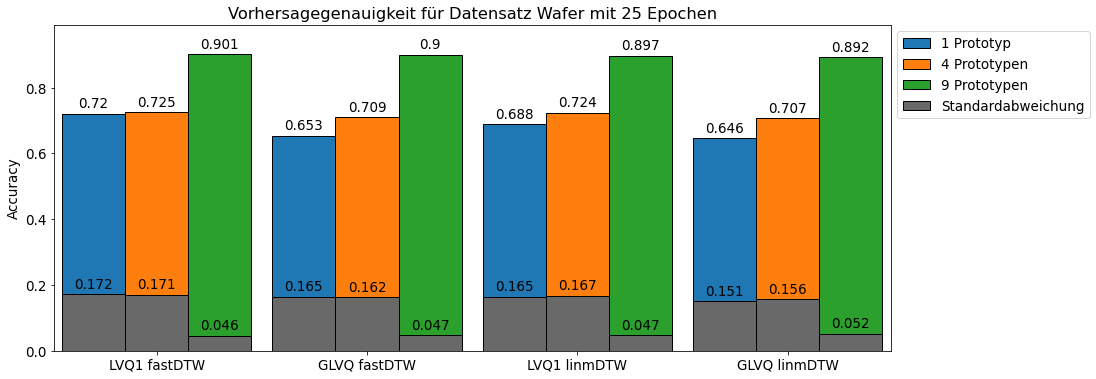

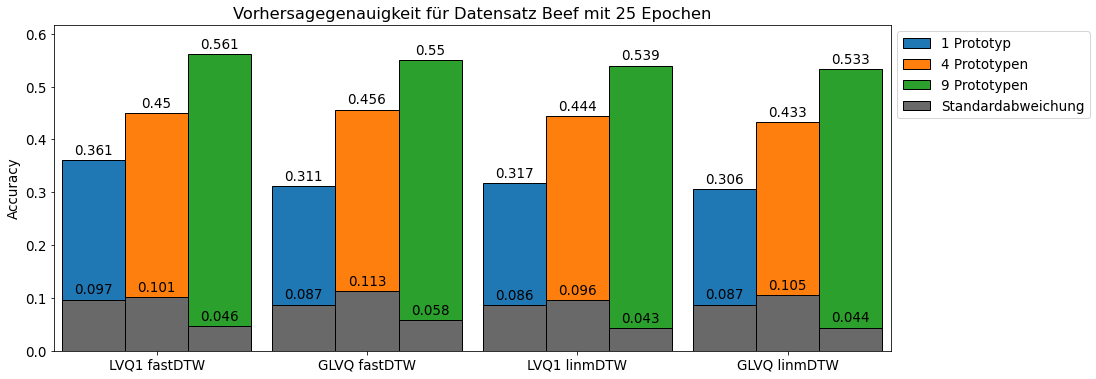

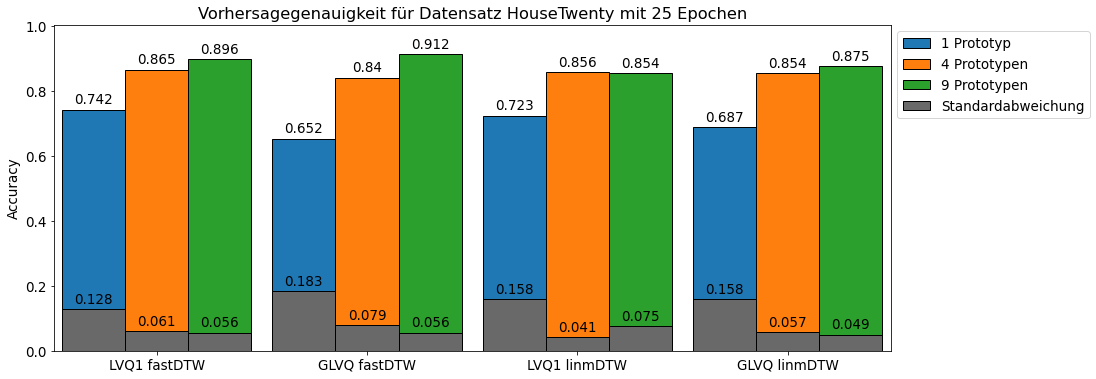

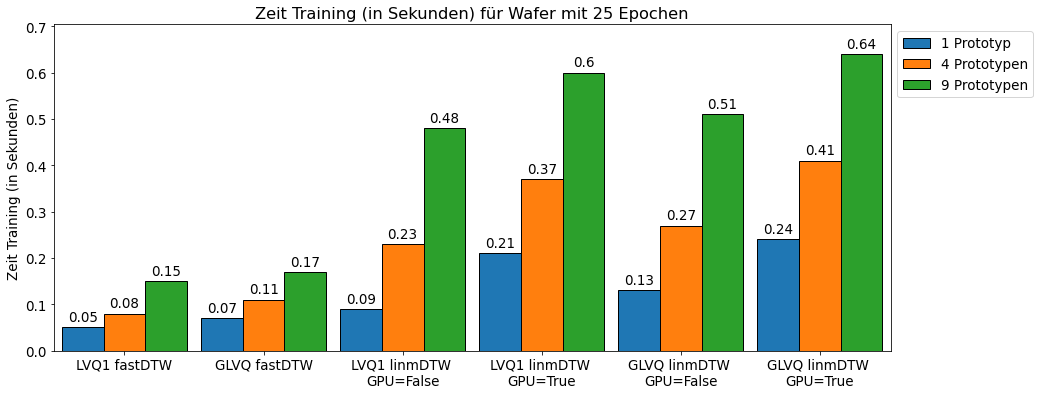

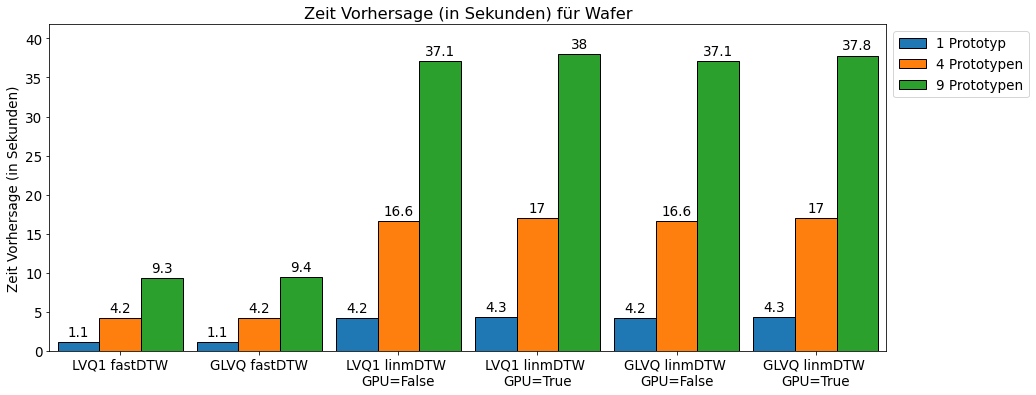

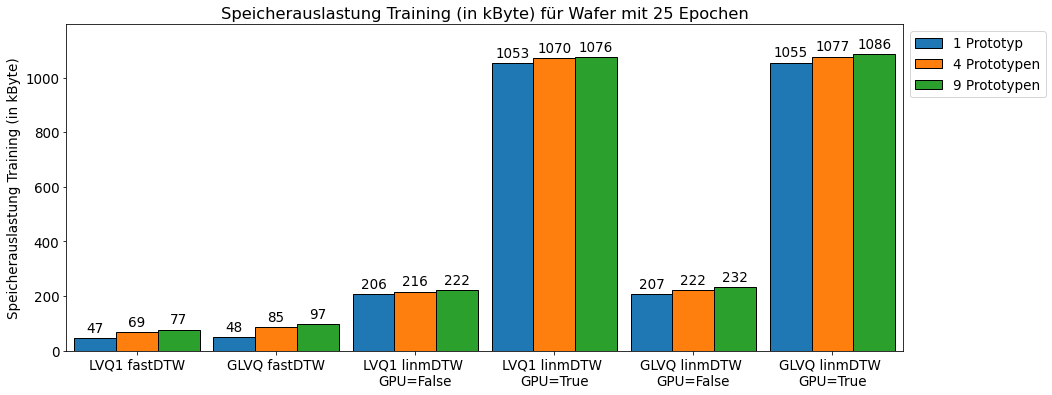

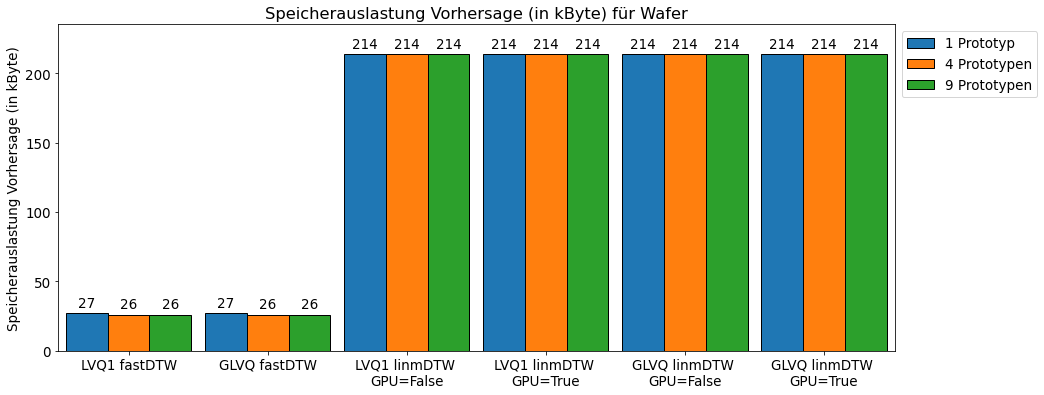

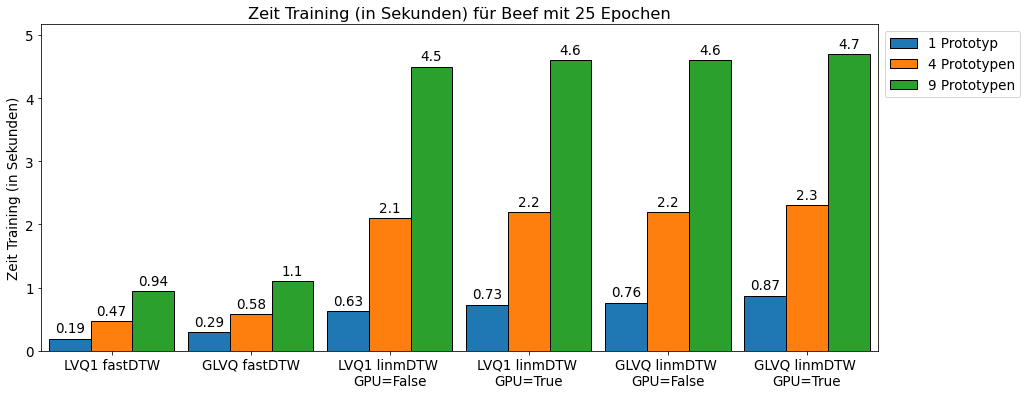

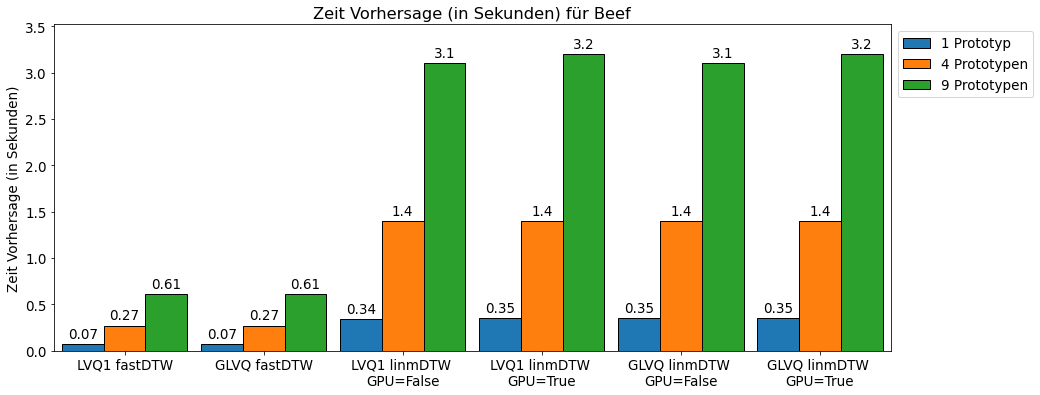

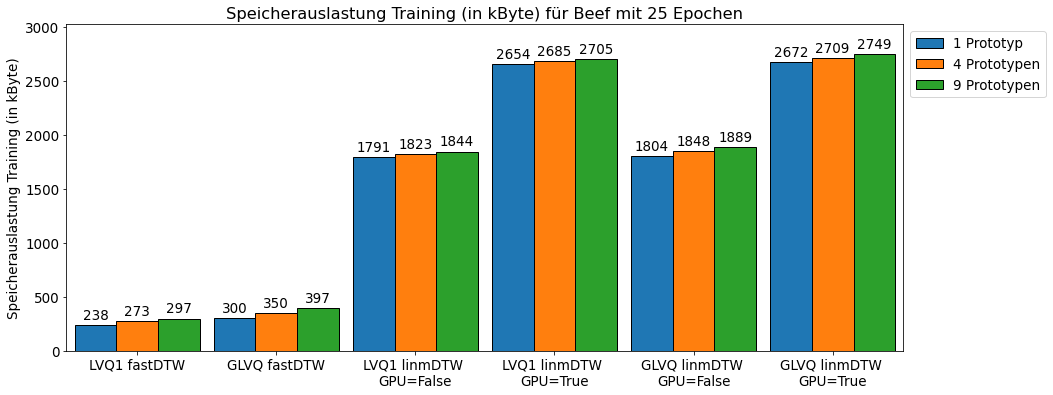

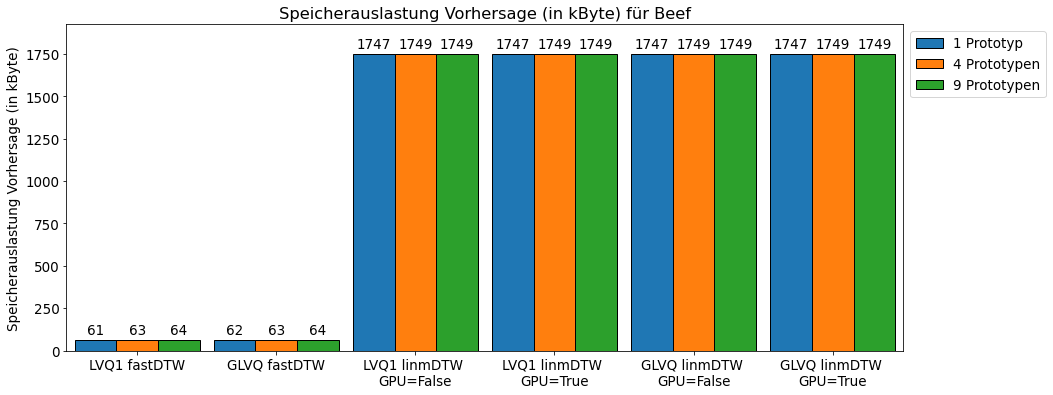

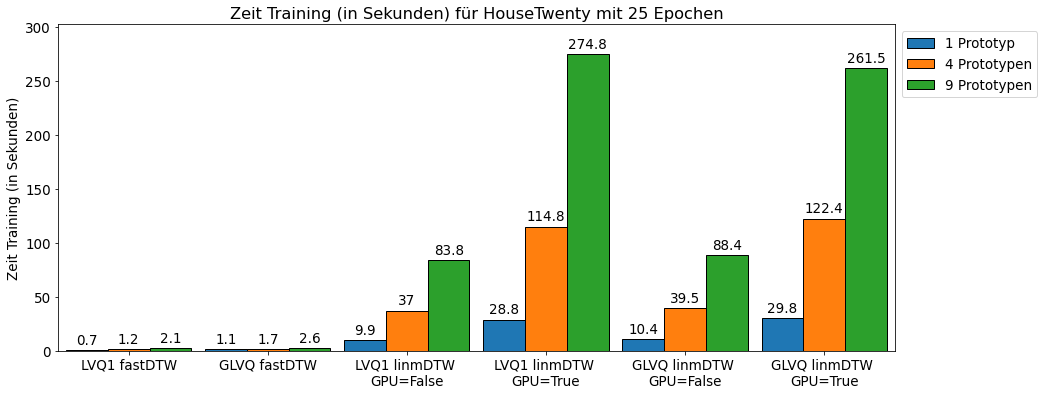

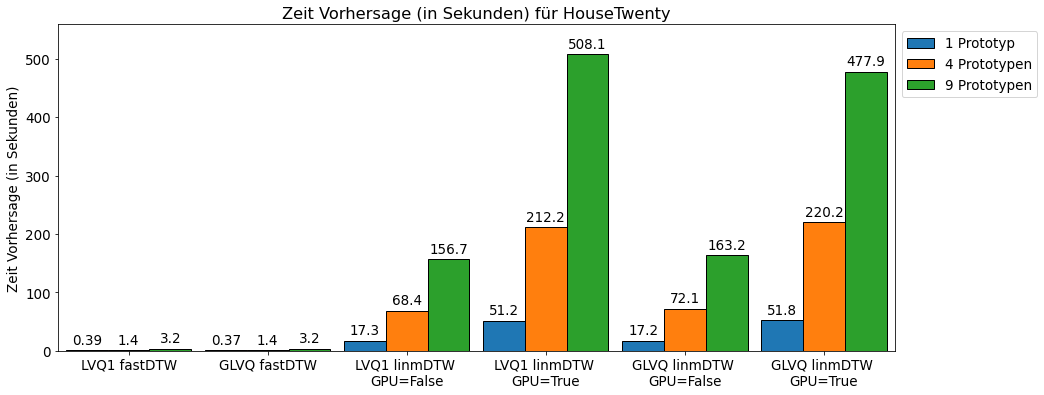

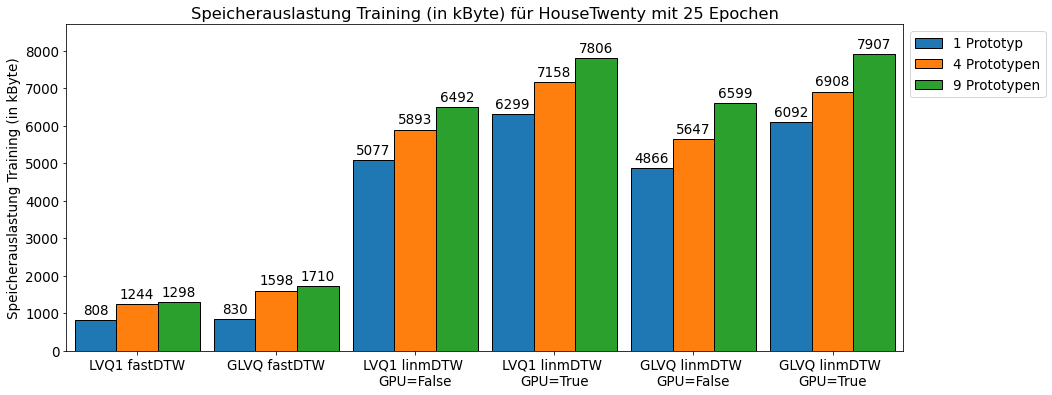

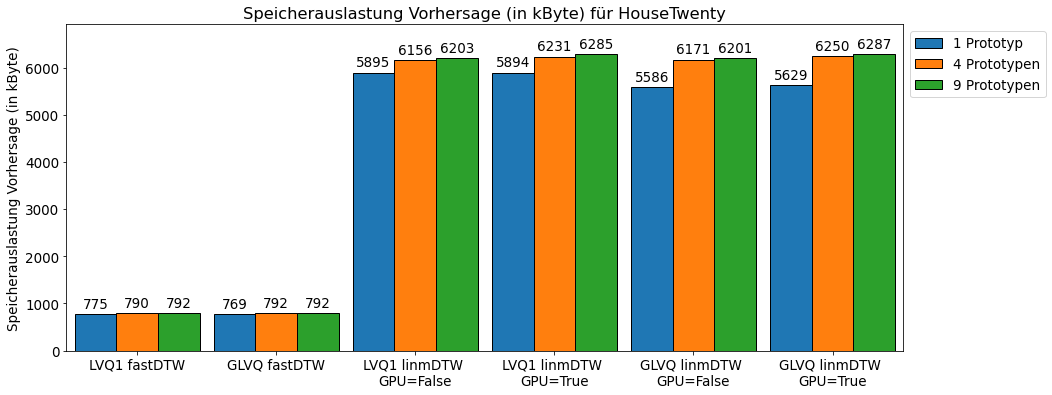

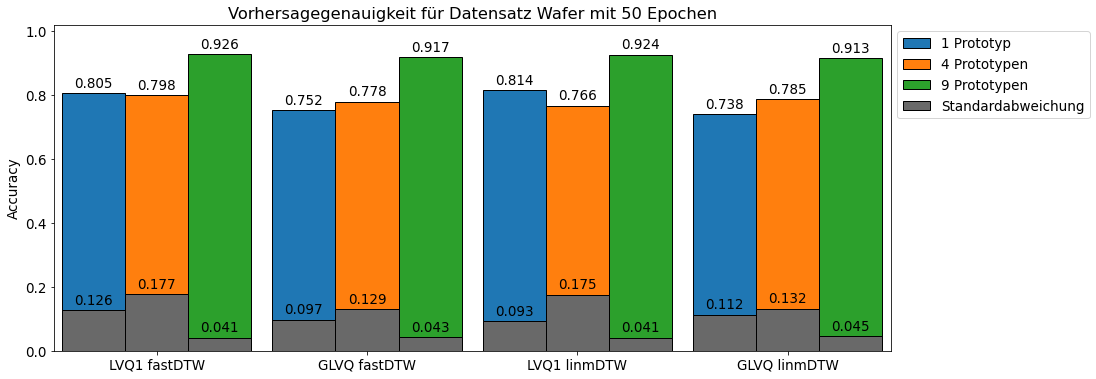

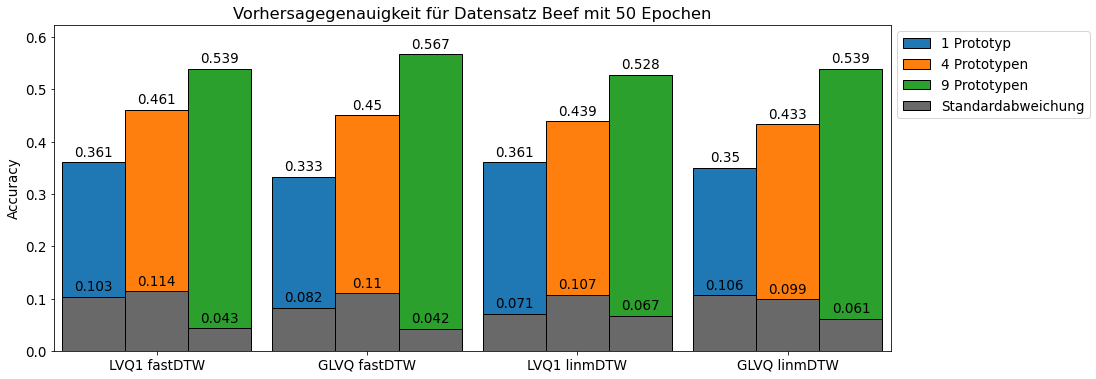

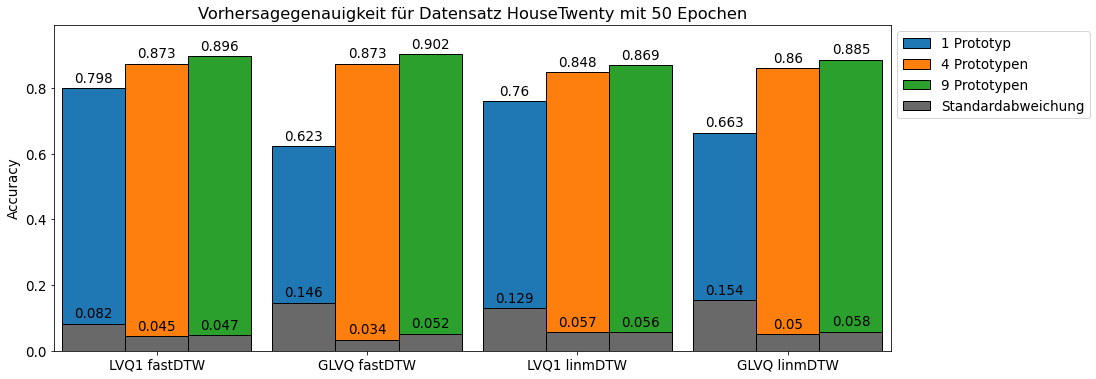

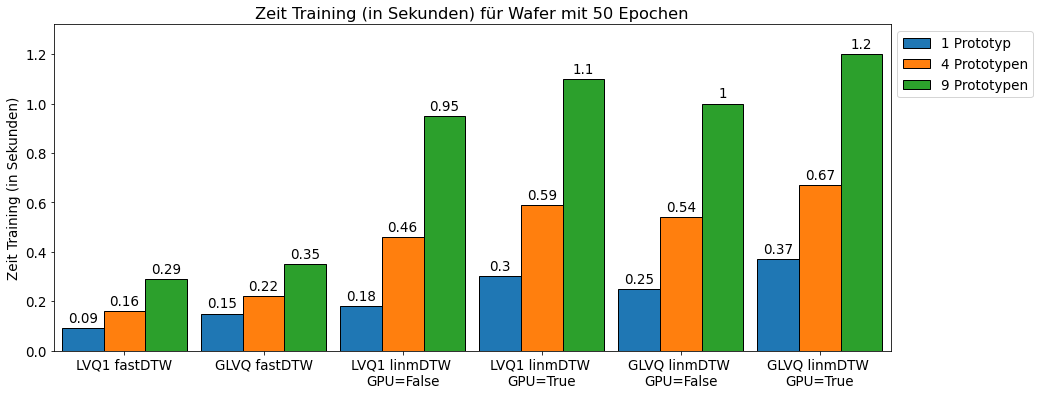

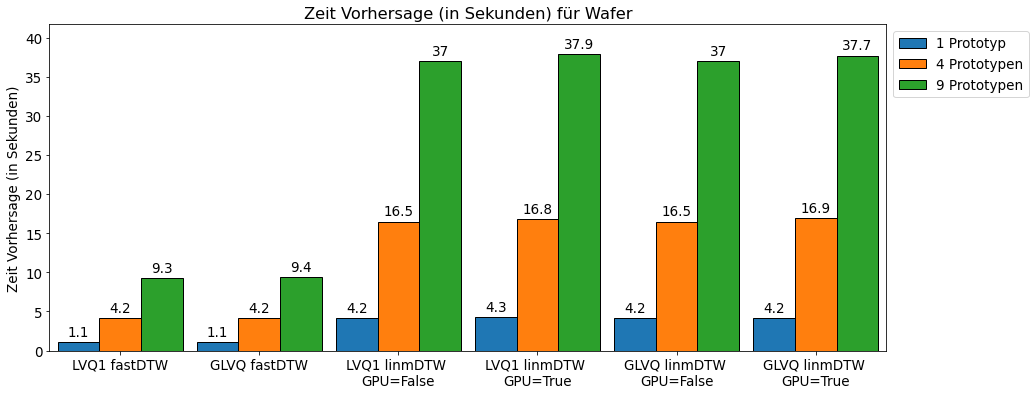

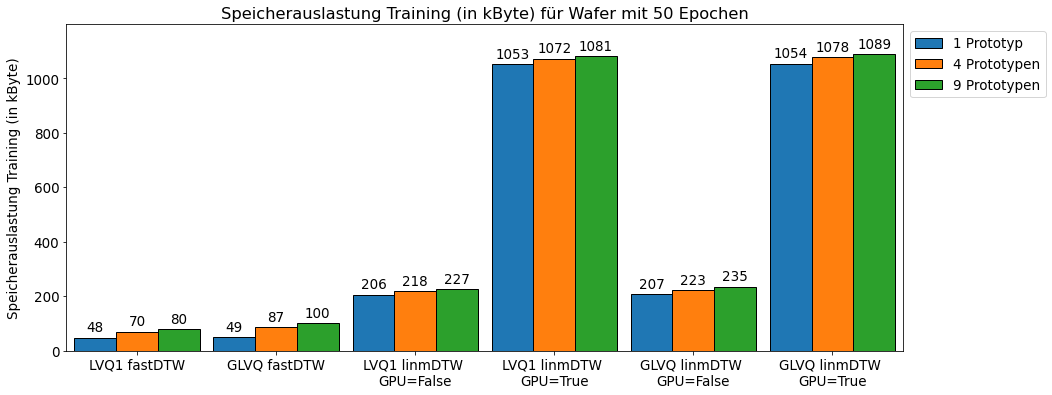

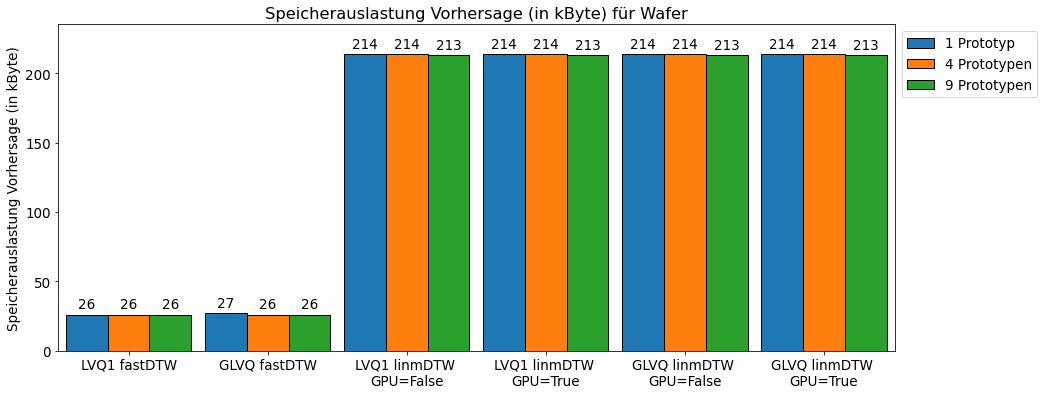

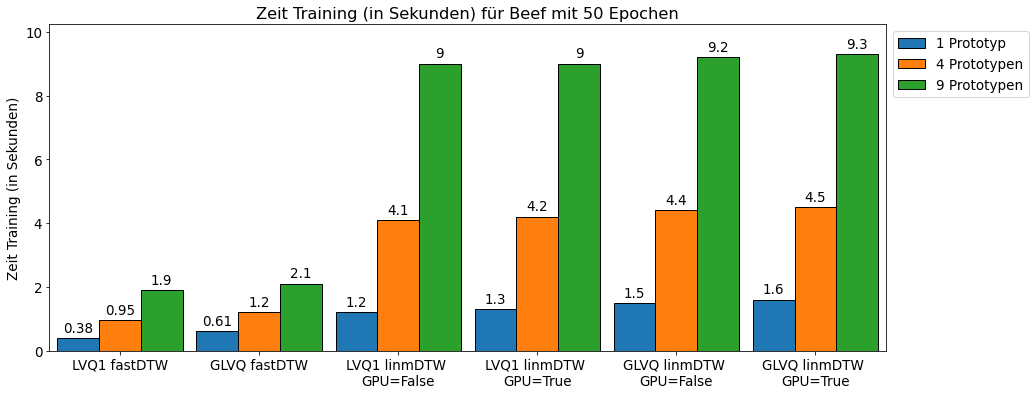

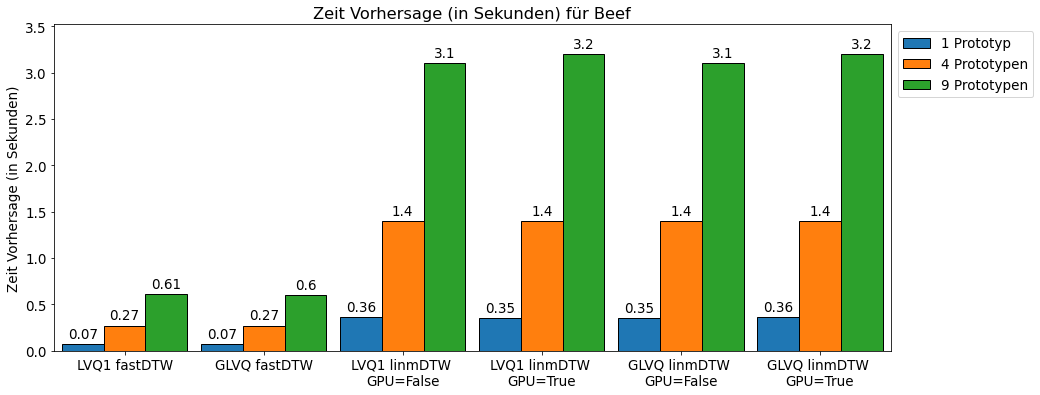

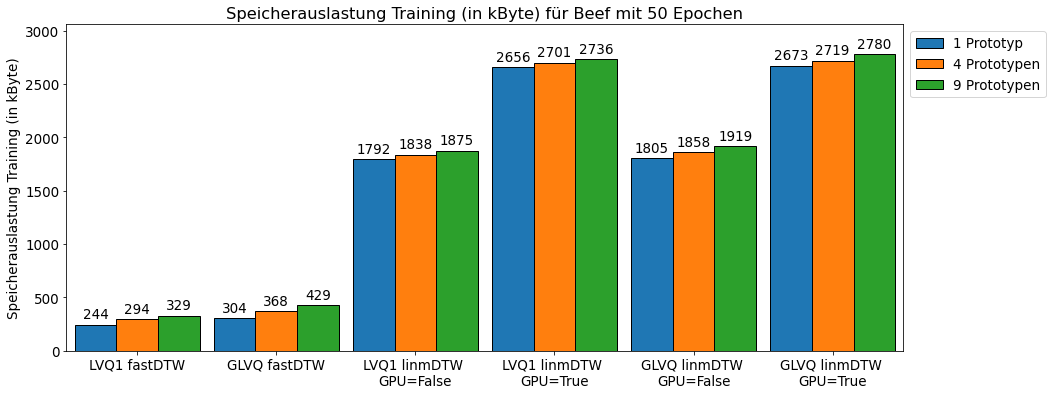

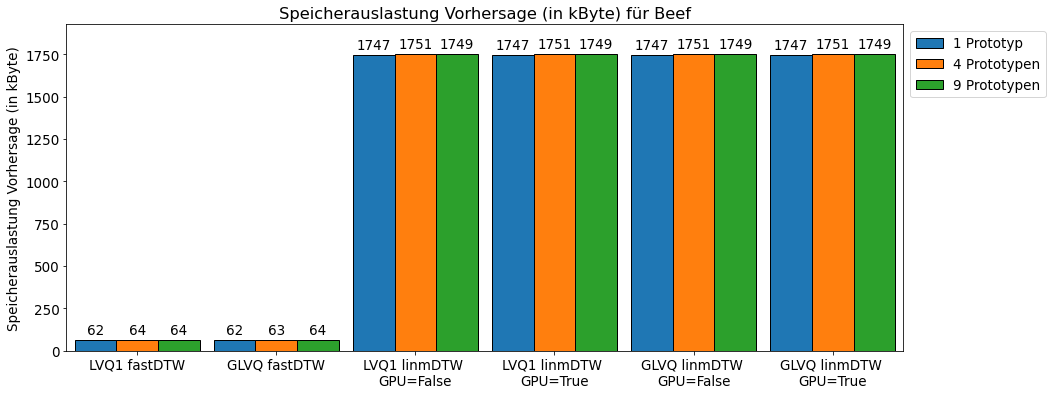

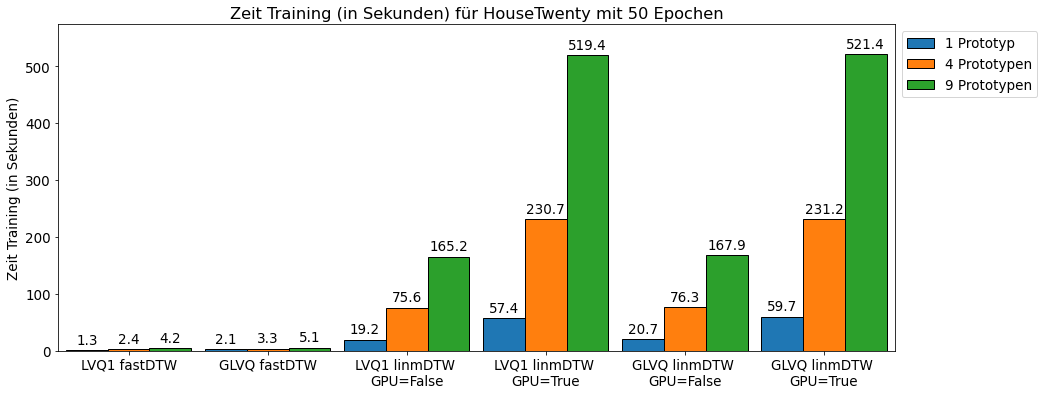

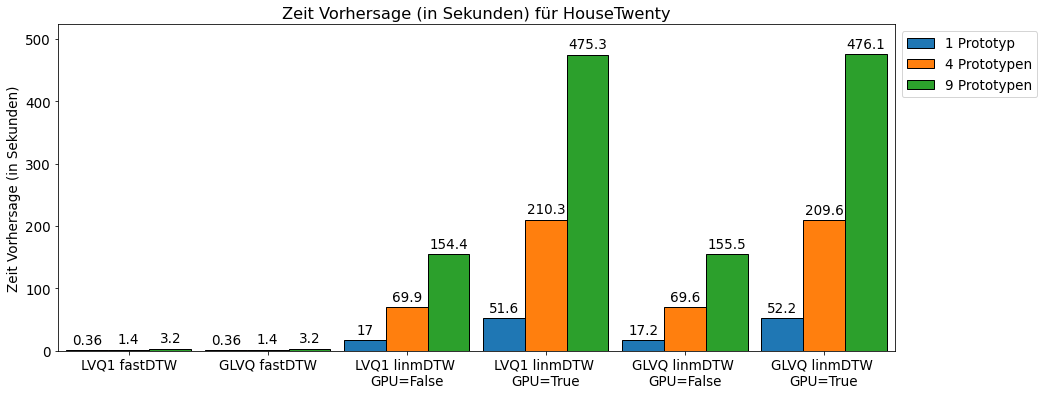

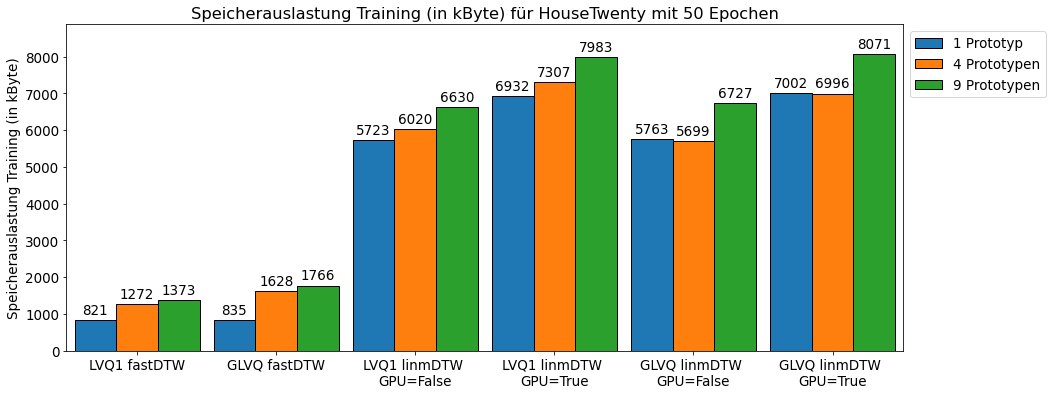

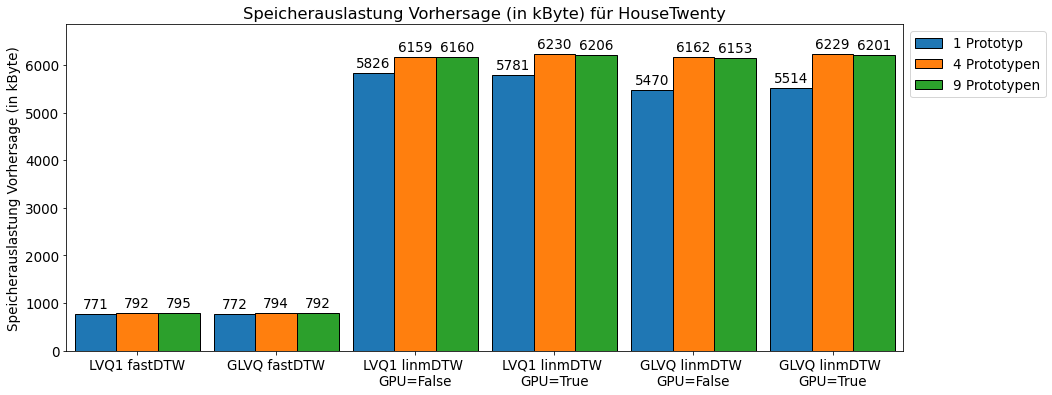

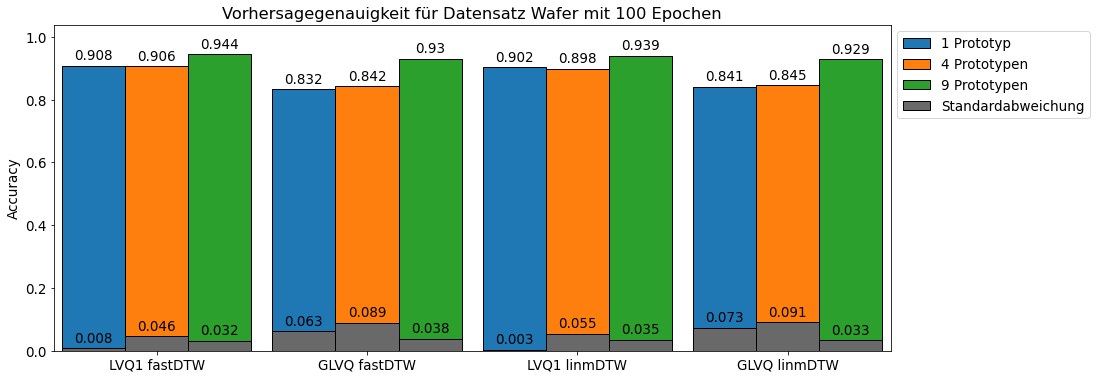

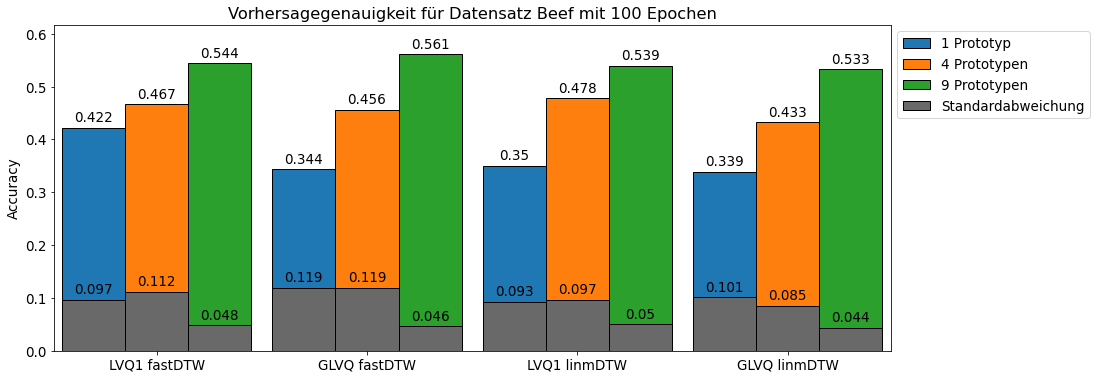

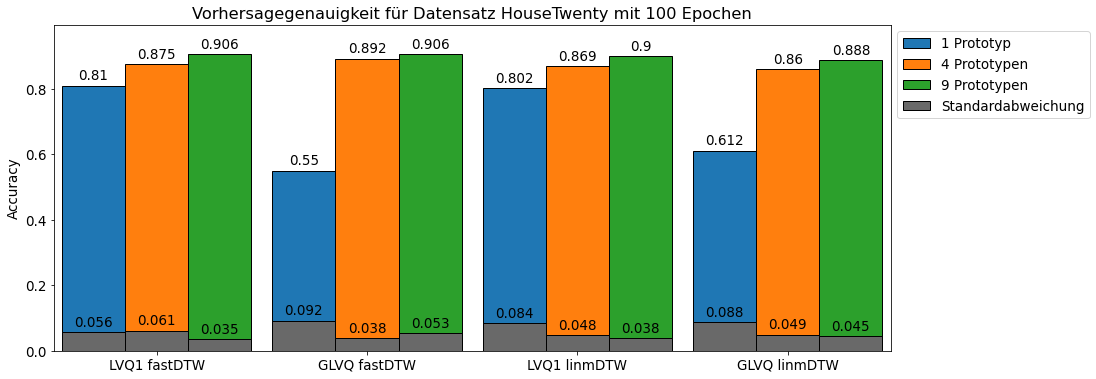

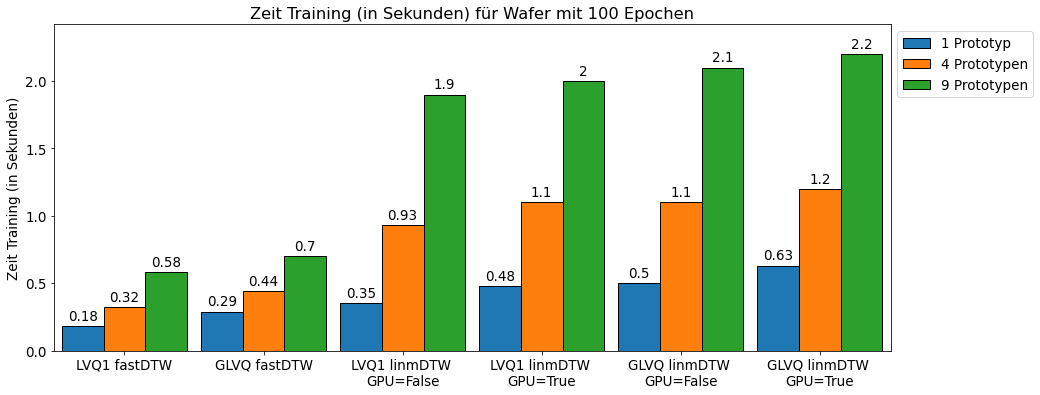

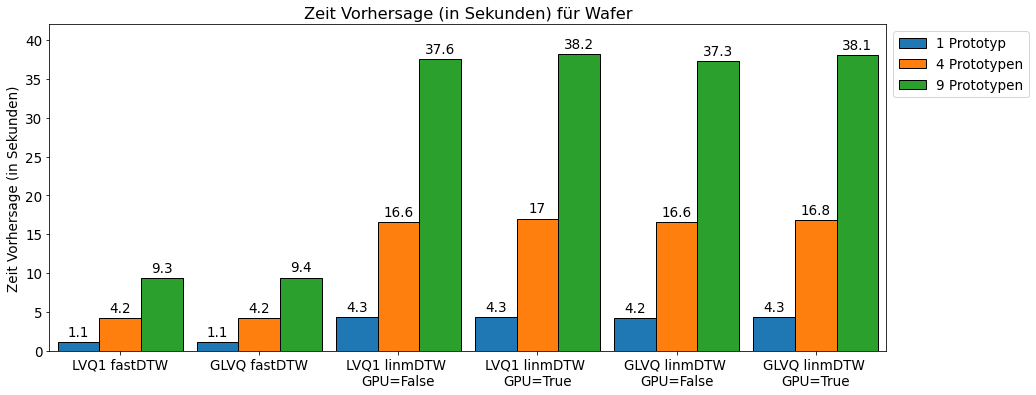

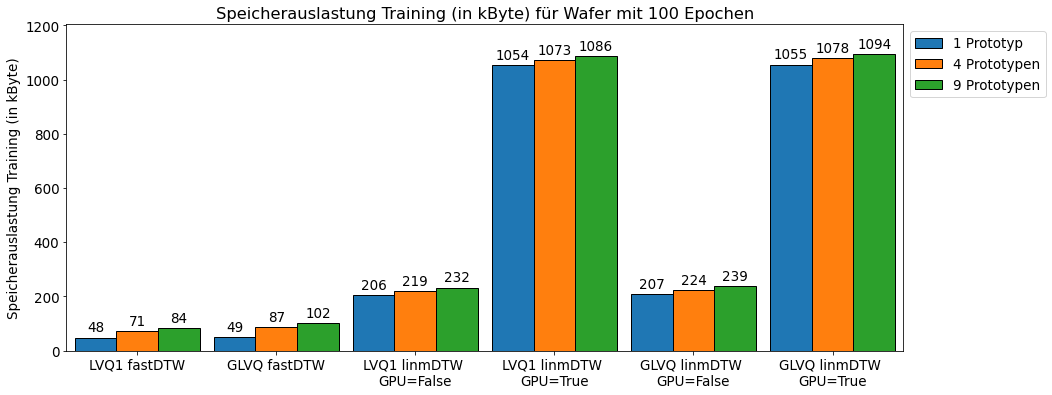

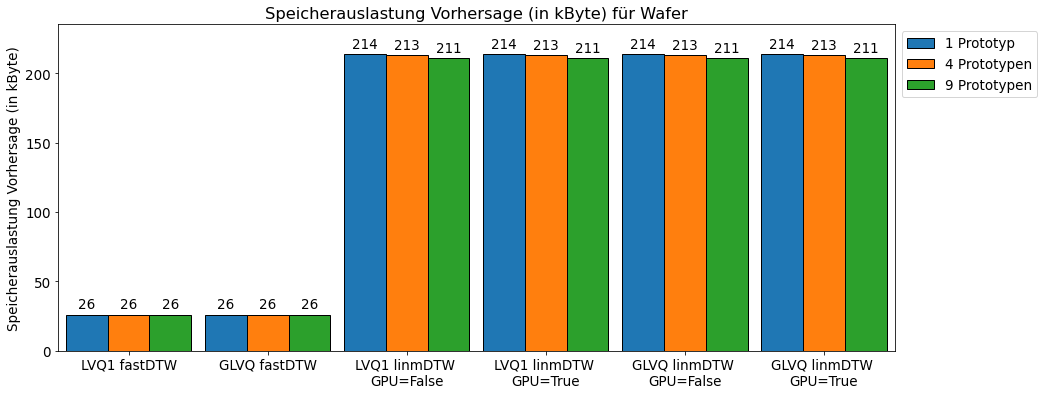

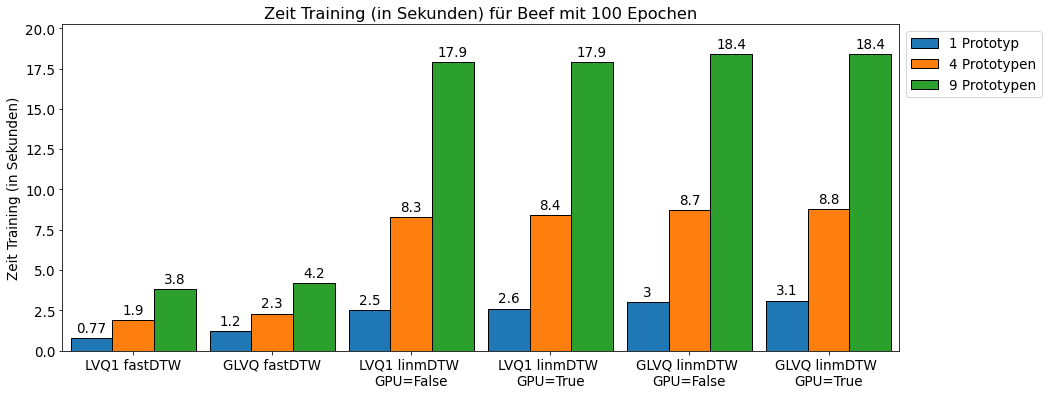

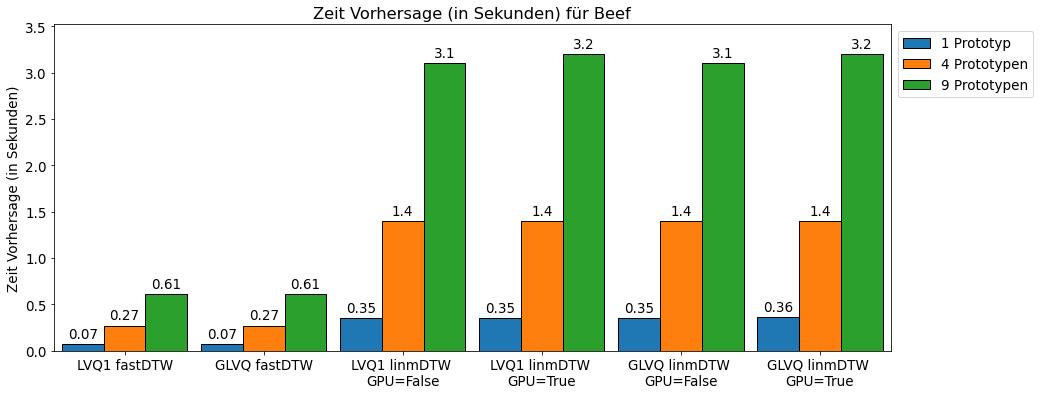

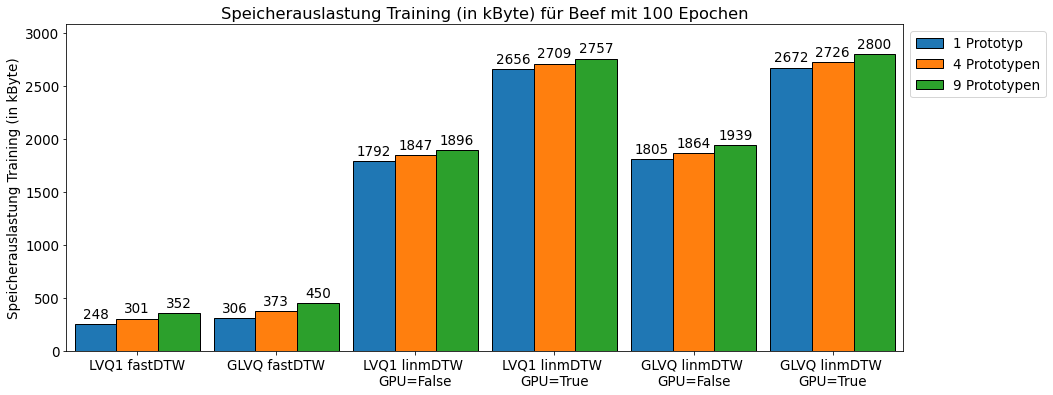

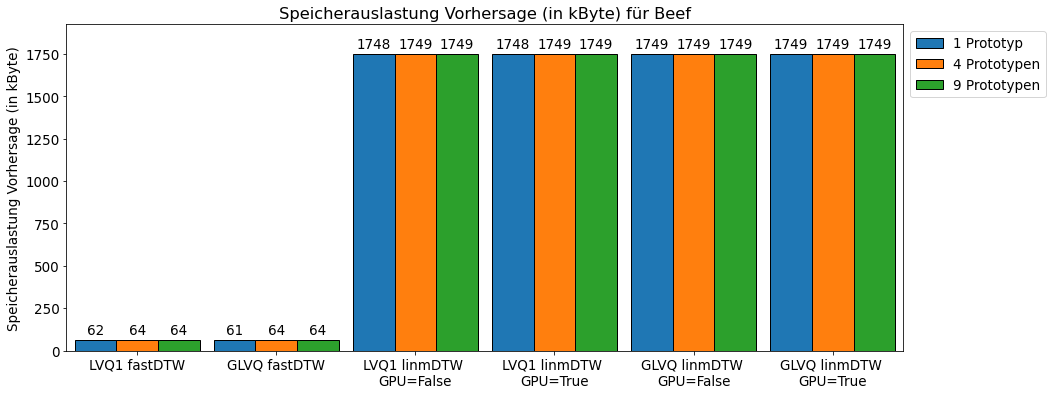

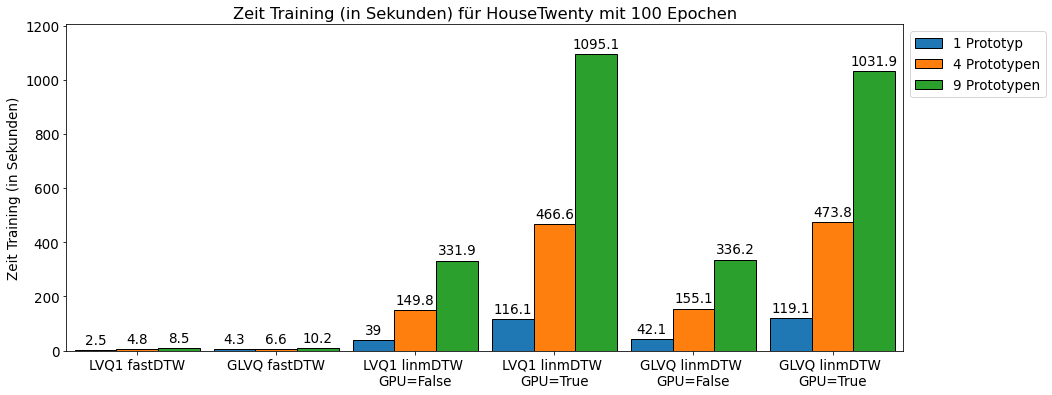

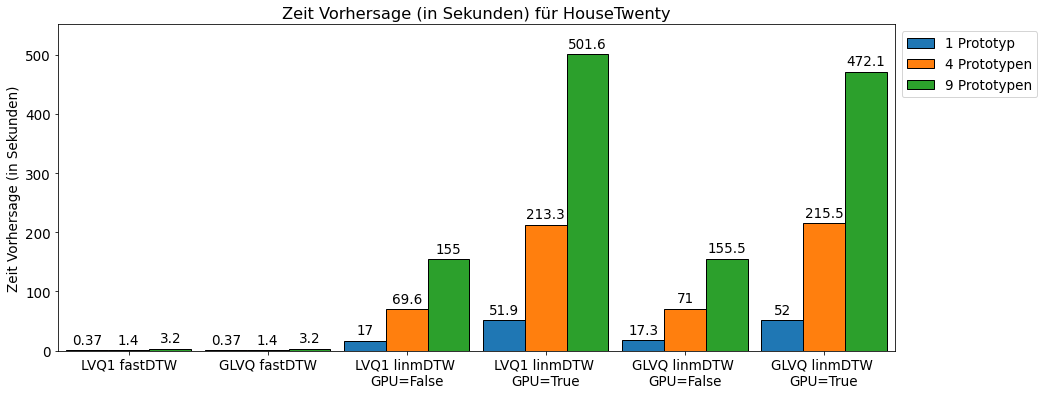

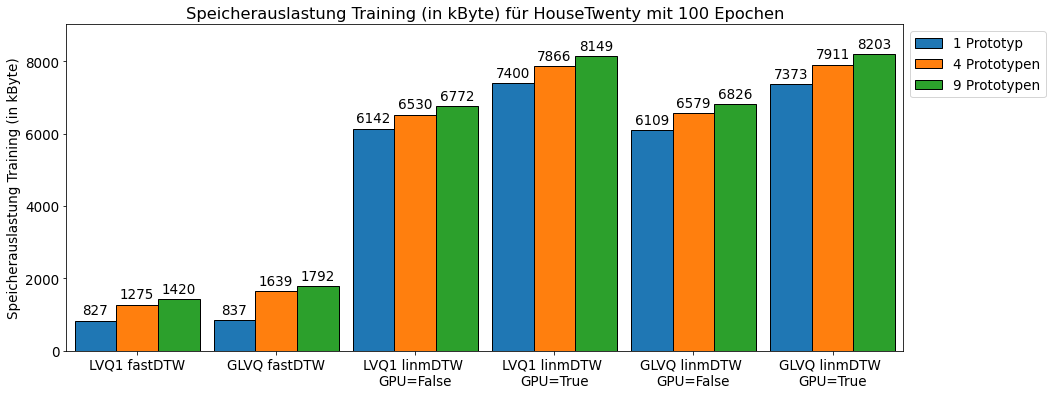

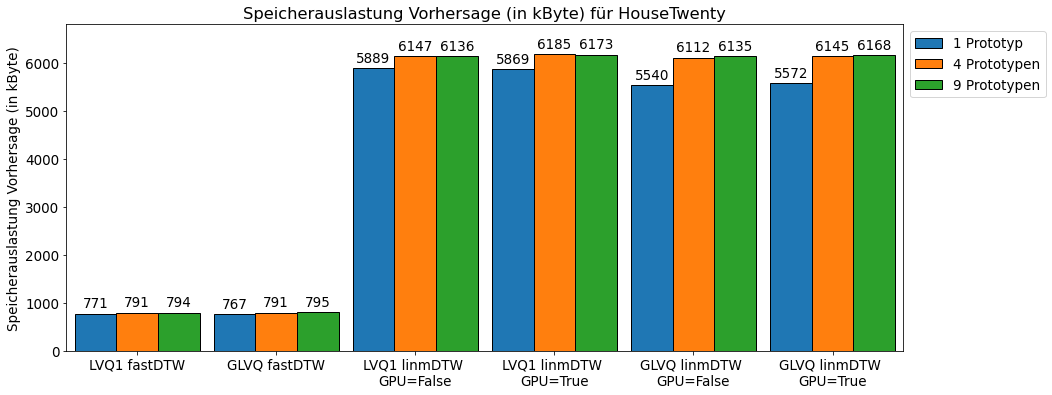

In [4]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
import pandas as pd

df = pd.DataFrame(updated)

epoch_25 = df.where(df["Epochen"] == 25.0).dropna()
epoch_50 = df.where(df["Epochen"] == 50.0).dropna()
epoch_100 = df.where(df["Epochen"] == 100.0).dropna()

plot_accuracy(epoch_25, 25)
plot_mem_time(epoch_25, 25)
plot_accuracy(epoch_50, 50)
plot_mem_time(epoch_50, 50)
plot_accuracy(epoch_100, 100)
plot_mem_time(epoch_100, 100)

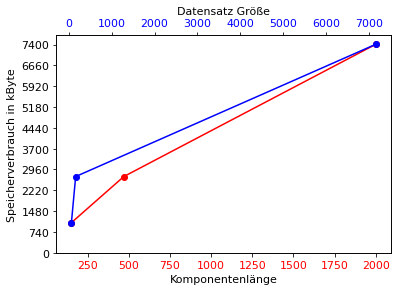

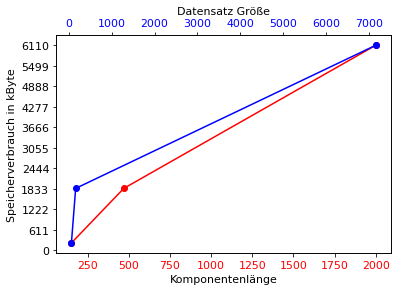

In [5]:
plot_linm_mem(df, True)
plot_linm_mem(df, False)